In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [2]:
def plot_country(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    discharged = df.recovered+df.deaths
    hospitalized = df.confirmed - discharged
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))

    plt.figure(figsize=(8,4))
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.plot(discharged,dashes=[2,2,6, 2],c='y',label='discharged')
    plt.plot(hospitalized,dashes=[2,2,6, 2],c='b',label='hospitalized')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.scatter(df.confirmed,diff.confirmed)
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 2))
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()
    
    print('discharged: ',discharged.iloc[-1])
    print('deaths: ',df.deaths.iloc[-1])
    print('%: ',(df.deaths.iloc[-1]/discharged.iloc[-1]*100))

    plt.figure(figsize=(8,4))
    plt.scatter(df.recovered+df.deaths,df.deaths)
    plt.title(country)
    plt.xlabel('discharged')
    plt.ylabel('deaths')
    plt.show()


In [3]:
# for c in json.columns:
#     print(c)

      date  confirmed  deaths  recovered
 2020-4-15       2643      43       1497
new  confirmed
      30.0


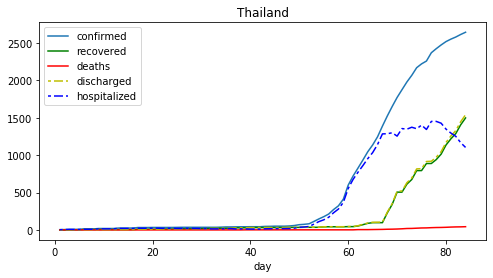

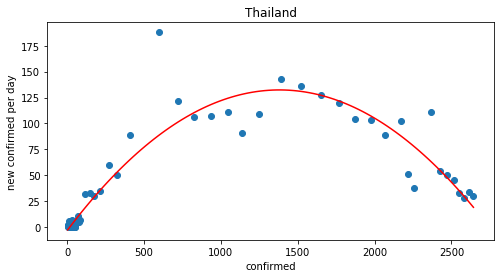

discharged:  1540
deaths:  43
%:  2.792207792207792


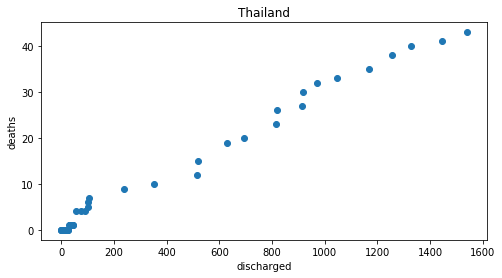

      date  confirmed  deaths  recovered
 2020-4-15       5072      83       2647
new  confirmed
      85.0


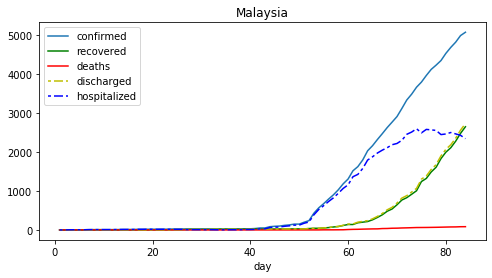

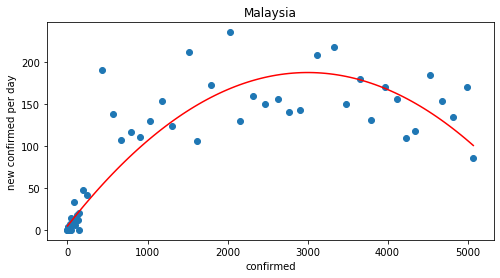

discharged:  2730
deaths:  83
%:  3.04029304029304


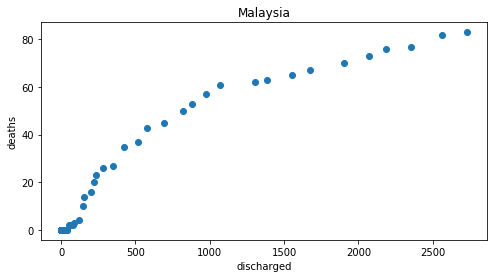

      date  confirmed  deaths  recovered
 2020-4-15       3699      10        652
new  confirmed
     447.0


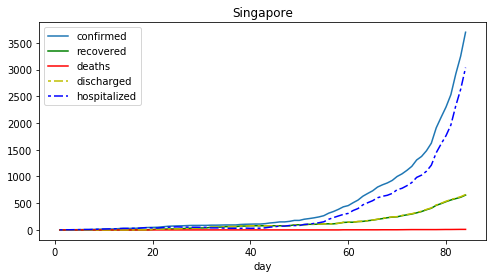

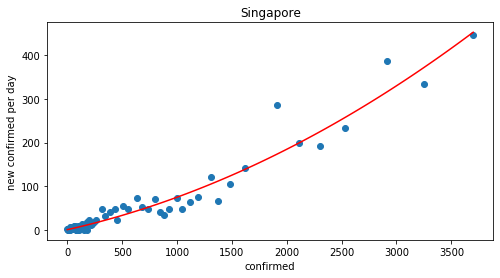

discharged:  662
deaths:  10
%:  1.5105740181268883


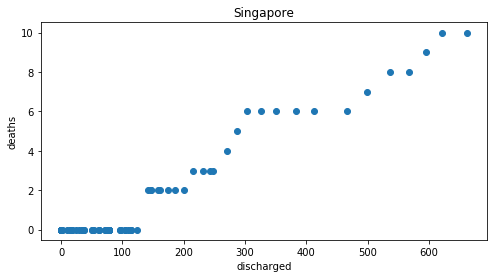

      date  confirmed  deaths  recovered
 2020-4-15       5136     469        446
new  confirmed
     297.0


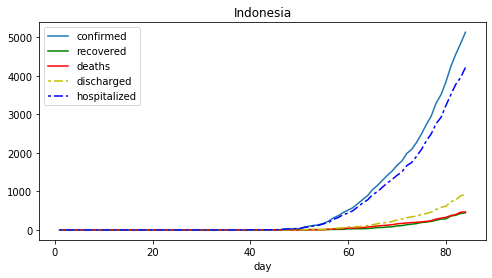

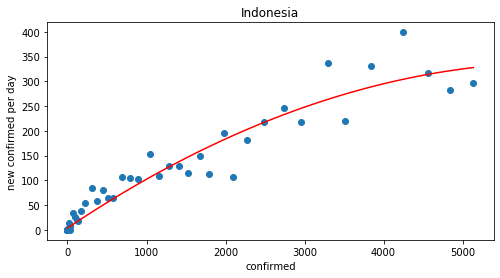

discharged:  915
deaths:  469
%:  51.256830601092894


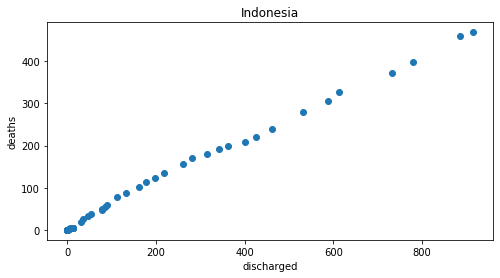

      date  confirmed  deaths  recovered
 2020-4-15     636350   28326      52096
new  confirmed
   28680.0


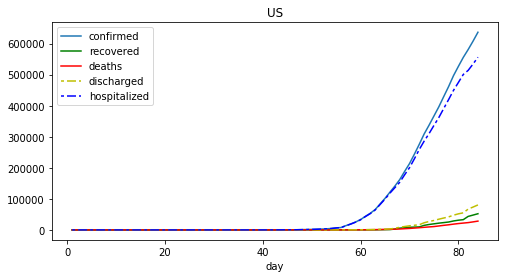

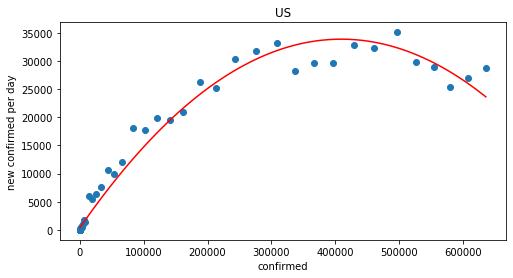

discharged:  80422
deaths:  28326
%:  35.221705503469195


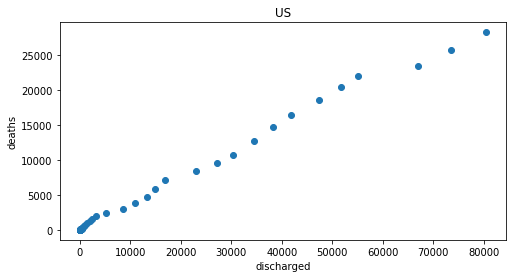

      date  confirmed  deaths  recovered
 2020-4-15      83356    3346      78311
new  confirmed
      50.0


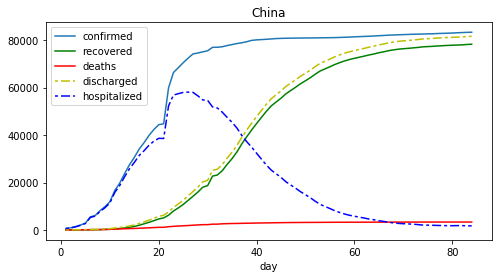

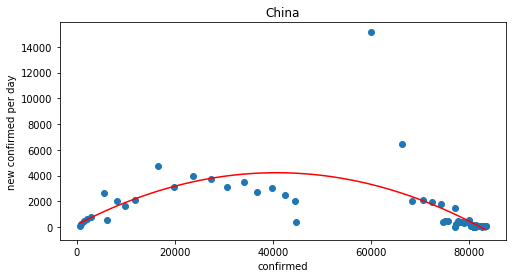

discharged:  81657
deaths:  3346
%:  4.0976278824840495


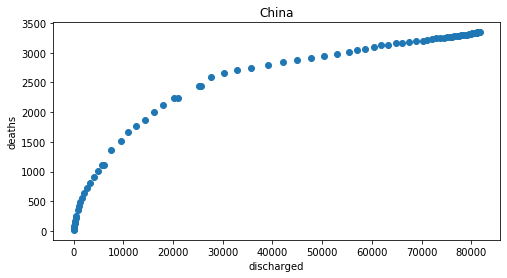

      date  confirmed  deaths  recovered
 2020-4-15      10591     225       7616
new  confirmed
      27.0


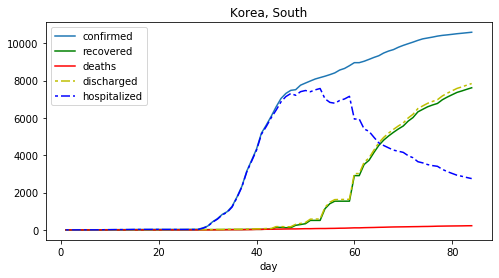

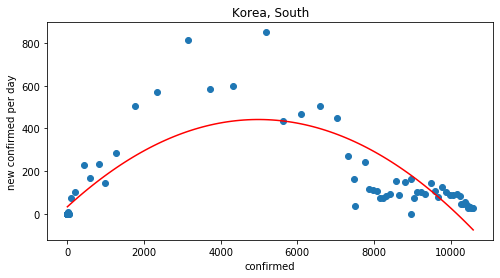

discharged:  7841
deaths:  225
%:  2.8695319474556817


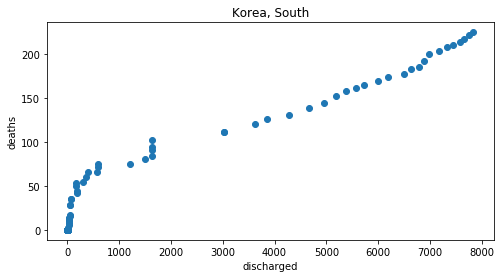

      date  confirmed  deaths  recovered
 2020-4-15     165155   21645      38092
new  confirmed
    2667.0


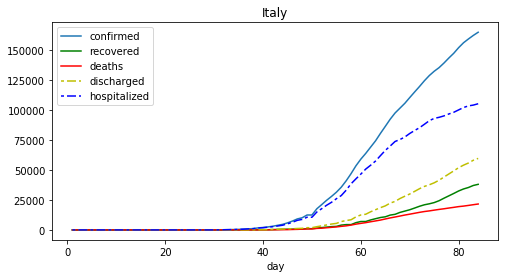

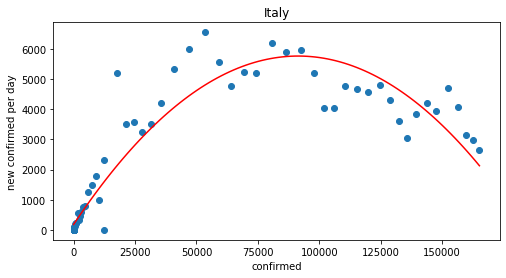

discharged:  59737
deaths:  21645
%:  36.233824932621324


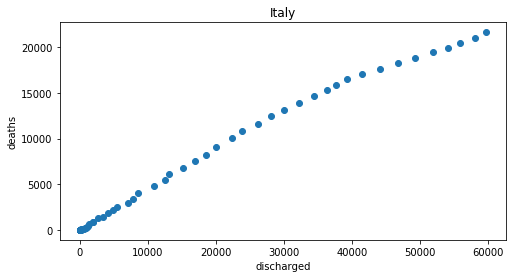

      date  confirmed  deaths  recovered
 2020-4-15     177644   18708      70853
new  confirmed
    5103.0


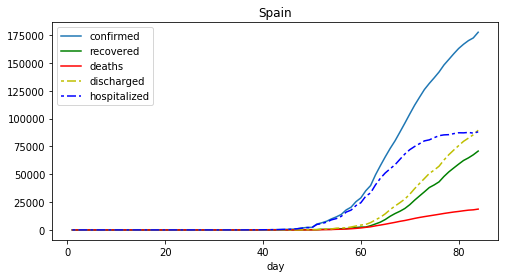

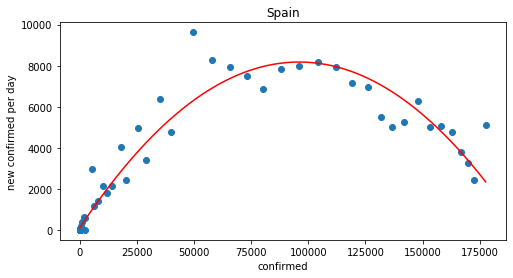

discharged:  89561
deaths:  18708
%:  20.888556402898583


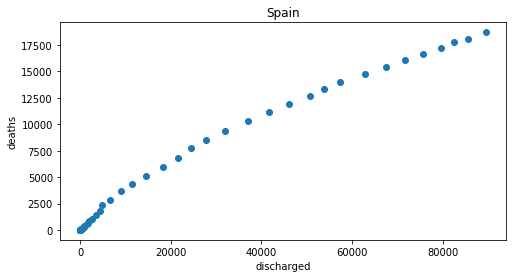

In [4]:
for c in ['Thailand','Malaysia','Singapore','Indonesia','US','China','Korea, South','Italy','Spain']:
    plot_country(c)
